In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

2023-06-19 08:17:29.991361: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 08:17:30.041120: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 08:17:30.042545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 08:17:30.944270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 3)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0., 1.0)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [37]:
X_train = pd.read_csv("../../raw_data/embeded_data/color_pallets_train.csv")
y_train = pd.read_csv("../../raw_data/train_y.csv", delimiter=" ", index_col="Id")['Genre_id']
X_test = pd.read_csv("../../raw_data/embeded_data/color_pallets_test.csv")
y_test = pd.read_csv("../../raw_data/test_y.csv", delimiter=" ", index_col="Id")['Genre_id']

In [38]:
X_train = X_train.fillna(-1)
X_test = X_test.fillna(-1)

In [39]:
y_train_cat = to_categorical(y_train, num_classes=30)
y_test_cat = to_categorical(y_test, num_classes=30)

In [40]:
y_train_cat.shape

(51300, 30)

In [41]:
X_test.shape

(5700, 36)

In [53]:
def initialize_model():
    model = Sequential()
    
    model.add(layers.Masking(mask_value=-1))
    
    model.add(layers.Dense(50, activation="relu", input_dim=15))

    model.add(layers.Dense(30, activation="softmax"))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [56]:
model_cnn = initialize_model()

es = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_accuracy")

history = model_cnn.fit(X_train, y_train_cat,
              epochs=1000,
              batch_size=16,
              validation_split=0.3,
              callbacks=[es]
             )


res = model_cnn.evaluate(X_test, y_test_cat, verbose=0)

print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

Epoch 1/1000
2245/2245 [==============================] - 5s 2ms/step - loss: 3.3070 - accuracy: 0.0556 - val_loss: 3.9482 - val_accuracy: 1.2995e-04
Epoch 2/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2887 - accuracy: 0.0623 - val_loss: 3.8640 - val_accuracy: 0.0028
Epoch 3/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2820 - accuracy: 0.0605 - val_loss: 3.8853 - val_accuracy: 0.0048
Epoch 4/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2781 - accuracy: 0.0651 - val_loss: 3.8666 - val_accuracy: 2.5991e-04
Epoch 5/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2754 - accuracy: 0.0657 - val_loss: 3.9185 - val_accuracy: 0.0015
Epoch 6/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2732 - accuracy: 0.0665 - val_loss: 3.9282 - val_accuracy: 0.0179
Epoch 7/1000
2245/2245 [==============================] - 4s 2ms/step - loss: 3.2712 - accuracy: 0.0649 - val_loss: 

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

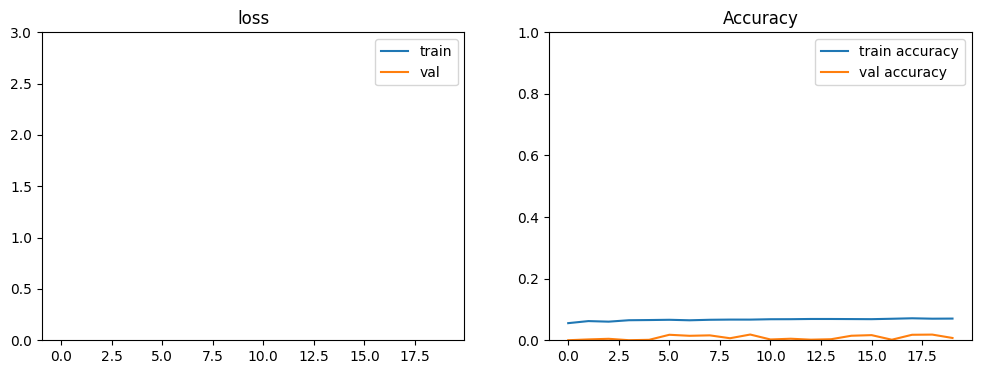

In [57]:
plot_history(history)

In [58]:
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

ValueError: in user code:

    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/chris/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_11' (type Sequential).
    
    Input 0 of layer "dense_25" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 36)
    
    Call arguments received by layer 'sequential_11' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 36), dtype=float64)
      • training=False
      • mask=None


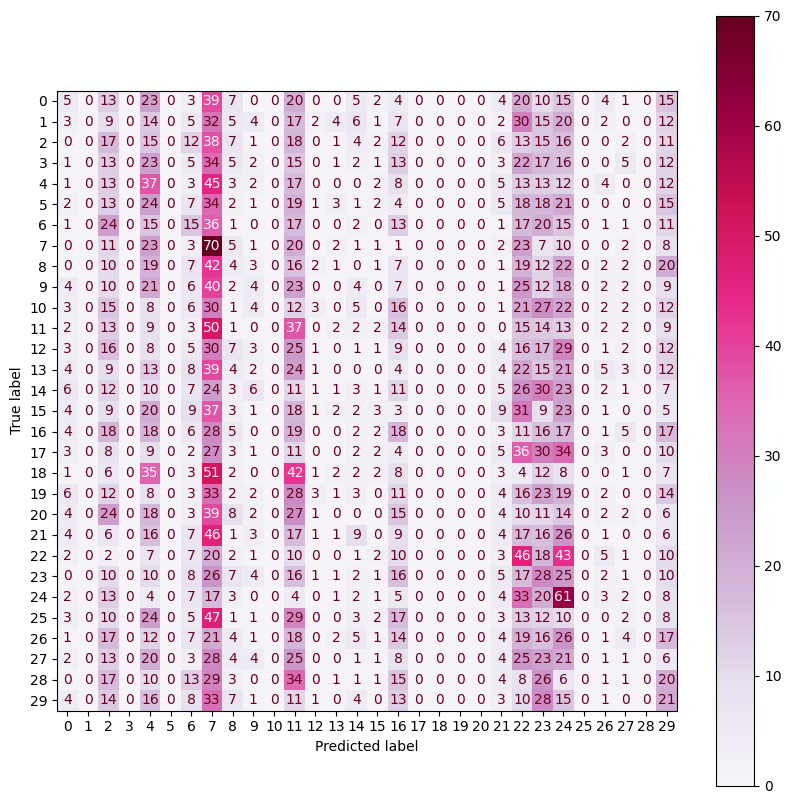

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap="PuRd", ax=ax)